In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fitz
from os import listdir
from os.path import join, split
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib
import pingouin as pg
from scipy.io import savemat
from datetime import datetime
import joblib

import sys
sys.path.append('/mnt/obob/staff/fschmidt/resting_tinnitus/utils')

from audiogram_utils import audiogram_scraper, plot_audiogram

import matplotlib as mpl
new_rc_params = {'text.usetex': False,
                 "svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

%matplotlib inline

#Constants

FIG_DIR = '/mnt/obob/staff/fschmidt/resting_tinnitus/results/'
DATA_DIR = '/mnt/obob/staff/fschmidt/resting_tinnitus/data/'

/mnt/obob/staff/fschmidt/conda_cache/envs/ml/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/mnt/obob/staff/fschmidt/conda_cache/envs/ml/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
data_path = '/mnt/obob/staff/fschmidt/nextcloud/audiogram/'
files = sorted(listdir(data_path))

file_paths = [join(data_path, file) for file in files]

audio_left = []
audio_right = []

for file in file_paths:
    try:
        audio_left_tmp, audio_right_tmp = audiogram_scraper(file, remove_weird=False)
        #print(file)
        try:
            audio_left_tmp['test_date'] = datetime.strptime(file[-10:-4], '%d%m%y')
            audio_right_tmp['test_date'] = datetime.strptime(file[-10:-4], '%d%m%y')
        except ValueError:
            print('ValueError: For this file %s the audiogram was saved in a wrong format' % file)
    except RuntimeError:
        print('RuntimeError: For this file %s the audiogram was saved in a wrong format' % file)
    audio_left.append(audio_left_tmp)
    audio_right.append(audio_right_tmp)
    
audiogram_left = pd.concat(audio_left)
audiogram_right = pd.concat(audio_right)

ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19500216ktfn_260722!.pdf the audiogram was saved in a wrong format
ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19570814lsri_190722!.pdf the audiogram was saved in a wrong format
ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19590330hnkw_190722!.pdf the audiogram was saved in a wrong format
ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19590729wlbh_10112022.pdf the audiogram was saved in a wrong format
ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19590926eisn_210722!.pdf the audiogram was saved in a wrong format
subject 19600507jnja has exactly the same values for both ears this is extremely unlikely
ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19610908fahf_071222!.pdf the audiogram was saved in a wrong format
ValueError: For this file /mnt/obob/staff/fschmidt/nextcloud/audiogram/19630808br

In [3]:
aud_left_melt = audiogram_left.melt(id_vars=['index', 'test_date'])
aud_right_melt = audiogram_right.melt(id_vars=['index', 'test_date'])

aud_left_melt.columns = ['subject_id', 'test_date', 'Frequency (Hz)', 'dB']
aud_right_melt.columns = ['subject_id', 'test_date', 'Frequency (Hz)', 'dB']

In [4]:
#order subjects by overall hearing ability
hearing_cmb = (aud_left_melt.groupby('subject_id').mean() + aud_right_melt.groupby('subject_id').mean()) / 2
hearing_cmb_sorted = hearing_cmb.sort_values(by='dB')
subject_order = hearing_cmb_sorted.index

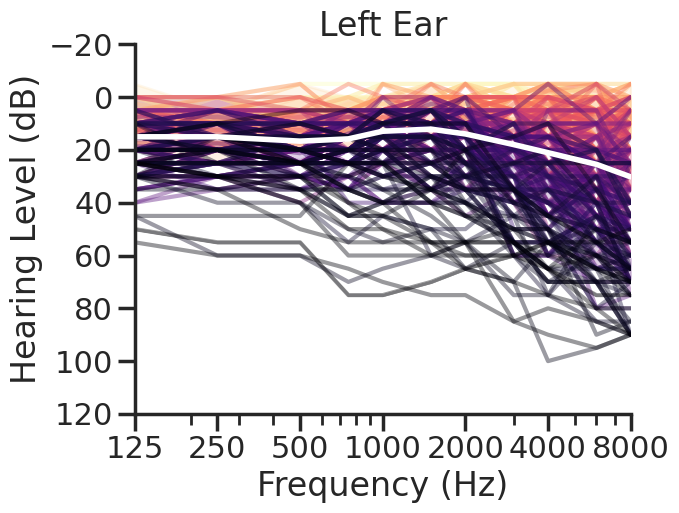

In [5]:
audiogram_all_left = plot_audiogram(aud_left_melt, order_names=subject_order, title='Left Ear')
sns.despine()
#audiogram_all_left.figure.savefig(join(FIG_DIR, 'LeftEar_audiogram_all.svg'), bbox_inches='tight')

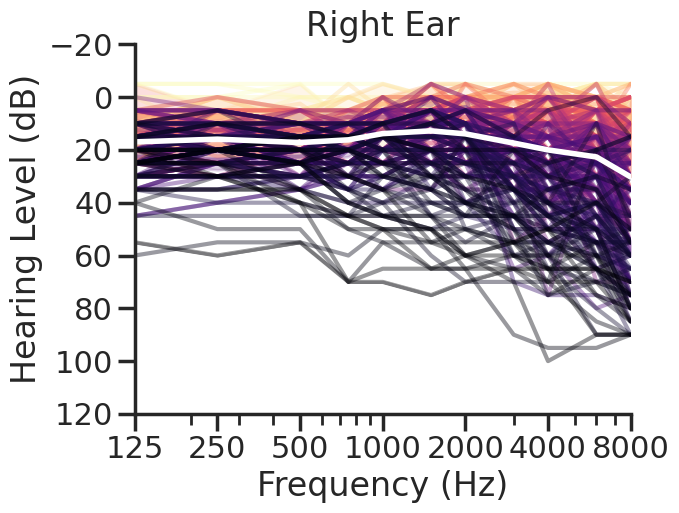

In [6]:
audiogram_all_right = plot_audiogram(aud_right_melt, order_names=subject_order, title='Right Ear');
sns.despine()
#audiogram_all_right.figure.savefig(join(FIG_DIR, 'RightEar_audiogram_all.svg'), bbox_inches='tight')

In [7]:
aud_left_melt.to_csv('/mnt/obob/staff/fschmidt/resting_tinnitus/data/aud_all_left.csv')
aud_right_melt.to_csv('/mnt/obob/staff/fschmidt/resting_tinnitus/data/aud_all_right.csv')

aud_left_melt['ear'] = 'left'
aud_right_melt['ear'] = 'right'


agramm_cmb = pd.concat([aud_left_melt, aud_right_melt])

In [8]:
agramm_cmb.drop_duplicates(subset=['subject_id', 'Frequency (Hz)', 'ear'], inplace=True)



In [9]:
df_pta = (agramm_cmb.groupby(['subject_id', 'Frequency (Hz)'])
           .mean()
           .reset_index()
           .groupby('subject_id')
           .mean()
           .reset_index()[['subject_id', 'dB']])

In [10]:
df_pta.to_csv('../data/pta_all_subs.csv')

In [11]:
agramm_lr.to_csv('/mnt/obob/staff/fschmidt/ngramm/data/data_online/agramm_cmb.csv')

NameError: name 'agramm_lr' is not defined